# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import nltk
import re
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import math
import time
from collections import defaultdict


#Graph Libraries
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Data Loading and Cleaning

In [2]:
dataset = pd.read_csv("../input/rusa-km-11k/RUSA_KM_11K.csv")
dataset.head()

Sentiment                                             Review
0  negative   ab achanak khawaja saad rafique ko khiyaal aa...
1  negative   adha drama to censor hi hojaye gaa , khaas to...
2  negative   bekaar fuzool end !!!!! moti budhi laila jeet...
3  negative            choor kasuri choor jhootay ka moo kaala
4  negative   gali gali mein shor hai gaaanjaaaa shair chor...

In [3]:
def create_corpus(target, column):
    corpus=[]
    
    for x in dataset[dataset['Sentiment']==target][column].str.split():
        for i in x:
            corpus.append(i)
    return corpus

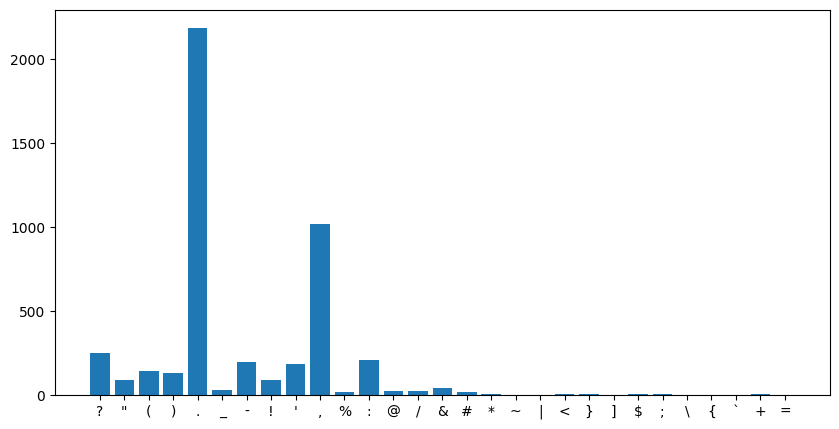

In [4]:
plt.figure(figsize=(10,5))
corpus=create_corpus('positive', 'Review')

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)
plt.savefig('Punctuations_Positive_reviews.png', dpi=300, bbox_inches='tight')

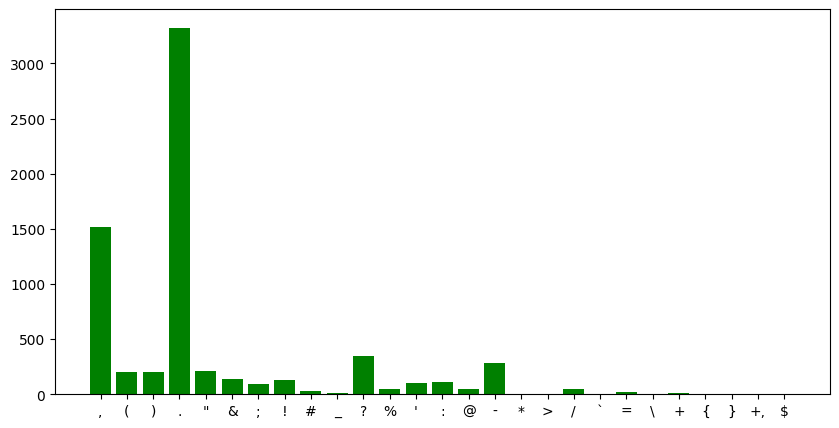

In [5]:
plt.figure(figsize=(10,5))
corpus=create_corpus('negative', 'Review')

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y,color='green')
plt.savefig('Punctuations_Negative_reviews.png', dpi=300, bbox_inches='tight')

In [6]:
# define punctuation
# Just leaving | sign so that checking function works fine after cleaning
punctuations = '''!|()-[]{};:'"\,`<>./?@#$%^&*_~=+,'''

def remove_punctuations(text_row):
    cleaned = ""
    for char in text_row:
       if char not in punctuations:
           cleaned = cleaned + char
    return cleaned.lower()

In [7]:
#Testing the function
my_str = "Hello!!!, he said ---and went."
print(remove_punctuations(my_str))

hello he said and went


In [8]:
cleaned_reviews = []
for i in range(len(dataset)):
    cleaned_review = remove_punctuations(dataset['Review'][i])
    cleaned_reviews.append(cleaned_review)
    
dataset['Cleaned_Review'] = cleaned_reviews
dataset.head()

Sentiment                                             Review  \
0  negative   ab achanak khawaja saad rafique ko khiyaal aa...   
1  negative   adha drama to censor hi hojaye gaa , khaas to...   
2  negative   bekaar fuzool end !!!!! moti budhi laila jeet...   
3  negative            choor kasuri choor jhootay ka moo kaala   
4  negative   gali gali mein shor hai gaaanjaaaa shair chor...   

                                      Cleaned_Review  
0   ab achanak khawaja saad rafique ko khiyaal aa...  
1   adha drama to censor hi hojaye gaa  khaas tor...  
2   bekaar fuzool end  moti budhi laila jeet gaye...  
3            choor kasuri choor jhootay ka moo kaala  
4   gali gali mein shor hai gaaanjaaaa shair chor...

In [9]:
# plt.figure(figsize=(10,5))
# corpus=create_corpus('positive', 'Cleaned_Review')

# dic=defaultdict(int)
# import string
# special = string.punctuation
# for i in (corpus):
#     if i in special:
#         dic[i]+=1
        
# x,y=zip(*dic.items())
# plt.bar(x,y)
# # plt.savefig('Punctuations_Positive_reviews.png', dpi=300, bbox_inches='tight')

# Lexical Normalization

### Defining Hashify Function

In [10]:
def hashify(word):
    #rule 1
    word = re.sub(r'ain$', r'ein', word)

    #rule 2
    firchr = word[:1]
    word=word[1:].replace("ar", "r") 
    word = firchr+word

    #rule 3
    word=word.replace("ai", "ae") 

    #rule 4
    word = re.sub(r'iyy+', r'i', word)
    
    #rule 5
    word = re.sub(r'ay$', r'e', word)
    
    #rule 6
    word = re.sub(r'ihh+', r'eh', word)
    
    #rule 7
    word = re.sub(r'ey$', r'e', word)
    
    #rule 8
    word = re.sub(r's+', r's', word)
    
    #rule 9
    word = re.sub(r'ie$', r'y', word)
    
    #rule 10
    endchr = word[-1:]
    word=word[:-1].replace("ry", "ri") 
    word = word + endchr
    
    #rule 11
    word = re.sub(r'^es', r'is', word)
    
    #rule 12
    endchr = word[-1:]
    word=word[:-1].replace("sy", "si") 
    word = word + endchr
    
    #rule 13
    word = re.sub(r'a+', r'a', word)
    
    #14 
    endchr = word[-1:]
    word=word[:-1].replace("ty", "ti") 
    word = word + endchr
    
    #15
    word = re.sub(r'j+', r'j', word)
    
    #16
    word = re.sub(r'o+', r'o', word)
    
    #17
    word = re.sub(r'(ee)+', r'i', word)
    
    #18
    if re.search(r'[bcdefghijklmnopqrtuvwxyz]i$', word):
        word = re.sub(r'i$', r'y', word)
        
    #19
    word = re.sub(r'd+', r'd', word)
    
    #20
    word=re.sub(r'u', r'o', word)
    
    #21
    word = re.sub(r'acefghijlmnoqrstuvwxyzh', '', word)
    
    return word

### Creating our own Dictionary

In [11]:
#Converting to Tokens
text=dataset.loc[:,dataset.columns=='Cleaned_Review']
comments = text
comments['Review'] = comments['Cleaned_Review']
comments.dtypes
comments["tokens"] = comments["Cleaned_Review"].apply(tokenizer.tokenize)

#Combining all tokens
tokens=[]
for row in comments['tokens']:
    tokens=tokens+row

#Printing shape of tokens
r=np.array(tokens)
actual_no_tokens=r.shape[0]


In [12]:
#Removing Duplicates from list
def rem_duplicates(x): 
    return list(dict.fromkeys(x))
mylist = rem_duplicates(tokens)
r=np.array(mylist)
r.shape
no_unique_tokens=r.shape[0]

In [13]:
print("Actual Tokens: ", len(tokens))
print("Unique Tokens: ", len(mylist))


Actual Tokens:  259586
Unique Tokens:  28193


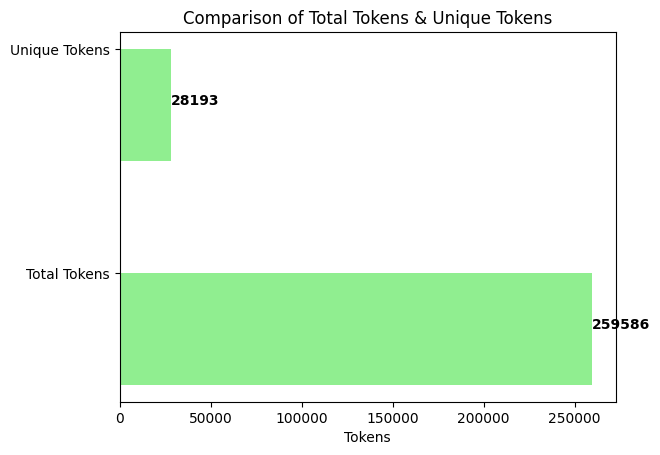

In [14]:
x = ['Total Tokens', 'Unique Tokens']
y = [actual_no_tokens, no_unique_tokens]
pre_normalization_tokens = no_unique_tokens

fig, ax = plt.subplots()    
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="lightgreen")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + 3, i, str(v), color='black', fontweight='bold')
plt.title('Comparison of Total Tokens & Unique Tokens')
plt.xlabel('Tokens')
plt.savefig('Tokens before Lexical Normalization.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
start=time.time()
hashfied_tokens=[]
for token in mylist:
    hashed_word = hashify(token)
    if hashed_word not in hashfied_tokens:
        hashfied_tokens.append(hashed_word)
end=time.time()
print(end-start) 

5.157105445861816


In [16]:
len(hashfied_tokens)

23131

In [17]:
word_arr={}

for word in tokens:
    if word in word_arr:
        word_arr[word].append(word)
    else:
        word_arr[word] = [word]

word_count={}
for w in word_arr:
    word_count[w] = len(word_arr[w])

### Combining words with same Hash

In [18]:
hash_dict = {}
for word in mylist:
    word_hash = hashify(word)
    if word_hash in hash_dict:
        hash_dict[word_hash].append(word)
    else:
        hash_dict[word_hash] = [word]
hash_dict

{'ab': ['ab', 'aab', 'aaab'],
 'achanak': ['achanak'],
 'khawaja': ['khawaja'],
 'sad': ['saad', 'sad', 'saddddd', 'sadd'],
 'rafiqoe': ['rafique'],
 'ko': ['ko', 'ku', 'koo'],
 'khiyal': ['khiyaal', 'khiyal'],
 'agaya': ['aagaya', 'agaya', 'agayaa'],
 'woh': ['woh'],
 'bhe': ['bhe', 'bhey'],
 'peshawr': ['peshawar'],
 'mae': ['mai', 'mae', 'maay', 'maae'],
 'is': ['is', 'iss', 'es', 'ess', 'isss'],
 'line': ['line'],
 'pae': ['pai', 'paay', 'paey'],
 '10': ['10'],
 'sal': ['saal', 'sal', 'saaal'],
 'sae': ['sai', 'sae', 'saay'],
 'koy': ['koi', 'koy', 'koie', 'kui', 'koee'],
 'trein': ['train', 'tarain'],
 'nahe': ['nahe'],
 'gozry': ['guzri', 'guzari', 'guzry'],
 'adha': ['adha', 'aadha'],
 'drama': ['drama', 'darama', 'dramaa'],
 'to': ['to', 'tu', 'too', 'tooo'],
 'censor': ['censor'],
 'hy': ['hi', 'hy', 'hee', 'hie'],
 'hojaye': ['hojaye', 'hojaaye'],
 'ga': ['gaa', 'ga', 'gaaa'],
 'khas': ['khaas', 'khas', 'khass'],
 'tor': ['tor', 'toor', 'toar'],
 'per': ['per', 'pear'],
 'bas

### Counting Frequencies of the words grouped by Sounds / Hash

In [19]:
hash_dict_count ={}
for hash_word in hash_dict:
    word_count_dict = {}
    for token in hash_dict[hash_word]:
        word_count_dict[token] =word_count[token]
    hash_dict_count[hash_word] = word_count_dict
hash_dict_count  

{'ab': {'ab': 754, 'aab': 15, 'aaab': 1},
 'achanak': {'achanak': 23},
 'khawaja': {'khawaja': 10},
 'sad': {'saad': 6, 'sad': 34, 'saddddd': 2, 'sadd': 1},
 'rafiqoe': {'rafique': 3},
 'ko': {'ko': 4044, 'ku': 30, 'koo': 16},
 'khiyal': {'khiyaal': 2, 'khiyal': 12},
 'agaya': {'aagaya': 7, 'agaya': 20, 'agayaa': 1},
 'woh': {'woh': 217},
 'bhe': {'bhe': 114, 'bhey': 2},
 'peshawr': {'peshawar': 15},
 'mae': {'mai': 387, 'mae': 47, 'maay': 4, 'maae': 1},
 'is': {'is': 1766, 'iss': 471, 'es': 154, 'ess': 4, 'isss': 2},
 'line': {'line': 32},
 'pae': {'pai': 11, 'paay': 1, 'paey': 1},
 '10': {'10': 63},
 'sal': {'saal': 92, 'sal': 29, 'saaal': 4},
 'sae': {'sai': 47, 'sae': 17, 'saay': 15},
 'koy': {'koi': 1228, 'koy': 8, 'koie': 7, 'kui': 2, 'koee': 4},
 'trein': {'train': 16, 'tarain': 2},
 'nahe': {'nahe': 113},
 'gozry': {'guzri': 7, 'guzari': 2, 'guzry': 1},
 'adha': {'adha': 4, 'aadha': 2},
 'drama': {'drama': 582, 'darama': 27, 'dramaa': 2},
 'to': {'to': 2926, 'tu': 540, 'too': 4

### Choosing Group Representatives based on Max Frequency

In [20]:
max_hash_word ={}

for hash_word in hash_dict_count:
    max_count_words = max(zip(hash_dict_count[hash_word].values(), hash_dict_count[hash_word].keys()))
    max_hash_word[hash_word]= max_count_words[1]

# Normalizing Dataset based on Dictionary

In [21]:
start=time.time()
standrized_reviews = []
for row in dataset['Cleaned_Review']:
    temp_row=''
    data = row.split() #split string into a list
    for word in data:
        standardized_word=hashify(word)
        if standardized_word in max_hash_word:
            temp_row=temp_row + ' ' + max_hash_word[standardized_word]
        else:
            temp_row=temp_row + ' ' + word
    standrized_reviews.append(temp_row)
dataset['Standardized_Review']=standrized_reviews
end=time.time()
print("Time in seconds", end-start)  

Time in seconds 6.854620456695557


In [22]:
dataset.head()

Sentiment                                             Review  \
0  negative   ab achanak khawaja saad rafique ko khiyaal aa...   
1  negative   adha drama to censor hi hojaye gaa , khaas to...   
2  negative   bekaar fuzool end !!!!! moti budhi laila jeet...   
3  negative            choor kasuri choor jhootay ka moo kaala   
4  negative   gali gali mein shor hai gaaanjaaaa shair chor...   

                                      Cleaned_Review  \
0   ab achanak khawaja saad rafique ko khiyaal aa...   
1   adha drama to censor hi hojaye gaa  khaas tor...   
2   bekaar fuzool end  moti budhi laila jeet gaye...   
3            choor kasuri choor jhootay ka moo kaala   
4   gali gali mein shor hai gaaanjaaaa shair chor...   

                                 Standardized_Review  
0   ab achanak khawaja sad rafique ko khiyal agay...  
1   adha drama to censor hi hojaye ga khas tor pe...  
2   bekaar fuzool end moti budhi laila jeet gayee...  
3                chor kasuri chor jhootay ka mu kala  
4       gali gali main shor hai ganja shair chor hai

In [23]:
#Converting to Tokens
text=dataset.loc[:,dataset.columns=='Standardized_Review']
comments = text
comments['Standardized_Review'] = comments['Standardized_Review']
comments.dtypes
comments["tokens"] = comments["Standardized_Review"].apply(tokenizer.tokenize)

#Combining all tokens
tokens=[]
for row in comments['tokens']:
    tokens=tokens+row

#Printing shape of tokens
r=np.array(tokens)
actual_no_tokens=r.shape[0]


In [24]:
#Removing Duplicates from list
def rem_duplicates(x): 
    return list(dict.fromkeys(x))
mylist = rem_duplicates(tokens)
r=np.array(mylist)
r.shape
no_unique_tokens=r.shape[0]

print("Actual Tokens: ", len(tokens))
print("Unique Tokens: ", len(mylist))

Actual Tokens:  259586
Unique Tokens:  23153


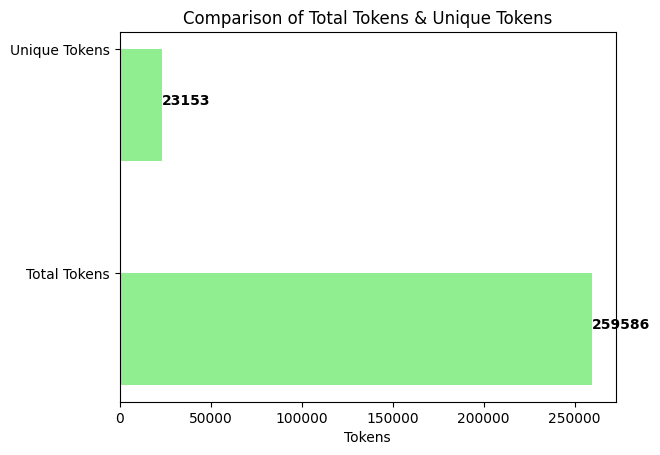

In [25]:
x = ['Total Tokens', 'Unique Tokens']
y = [actual_no_tokens, no_unique_tokens]
post_normalization_tokens = no_unique_tokens
fig, ax = plt.subplots()    
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="lightgreen")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + 3, i, str(v), color='black', fontweight='bold')
plt.title('Comparison of Total Tokens & Unique Tokens')
plt.xlabel('Tokens')     
plt.show()

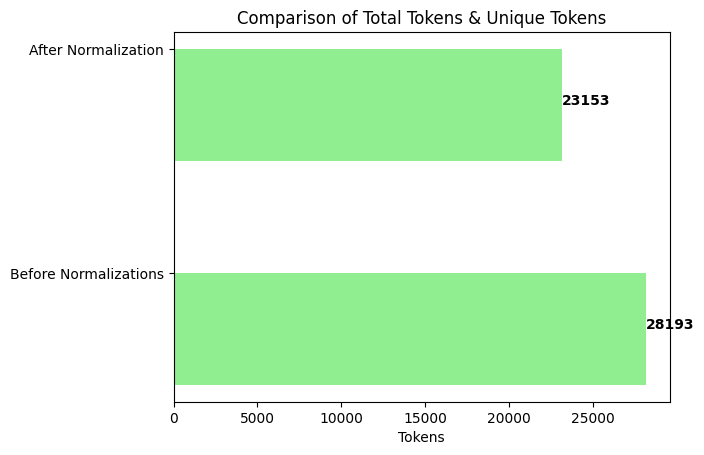

In [26]:
x = ['Before Normalizations', 'After Normalization']
y = [pre_normalization_tokens, post_normalization_tokens]
post_normalization_tokens = no_unique_tokens
fig, ax = plt.subplots()    
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="lightgreen")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + 3, i, str(v), color='black', fontweight='bold')
plt.title('Comparison of Total Tokens & Unique Tokens')
plt.xlabel('Tokens')     
plt.savefig('Result of Lexical Normalization.png', dpi=300, bbox_inches='tight')
plt.show()

# Phonetic Algorithms / Encodings

In [27]:
from abydos import phonetic as ph
soundex = ph.Soundex()
ref_soundex = ph.RefinedSoundex()
meta_soundex = ph.MetaSoundex()
fuzzy_soundex = ph.FuzzySoundex()
lein = ph.LEIN()
nysiis = ph.NYSIIS()
caverphone = ph.Caverphone()
soundd = ph.SoundD()
metaphone = ph.Metaphone()


class Encodings:
    def encode(self, data, enc_technique):
        if enc_technique == 'Soundex':
            return self._soundex(data)
        if enc_technique == 'RefinedSoundex':
            return self._refined_soundex(data)
        if enc_technique == 'MetaSoundex':
            return self._meta_soundex(data)
        if enc_technique == 'FuzzySoundex':
            return self._fuzzy_soundex(data)
        if enc_technique == 'LEIN':
            return self._LEIN(data)
        if enc_technique == 'NYSIIS':
            return self._NYSIIS(data)
        if enc_technique == 'Caverphone':
            return self._Caverphone(data)
        if enc_technique == 'SoundD':
            return self._SoundD(data)
        if enc_technique == 'Metaphone':
            return self._Metaphone(data)


    def _soundex(self, data):
        encoded = []
        data = data.apply(tokenizer.tokenize)
        for row in data:
            temp_row = ""
            for word in row:
                temp_word = soundex.encode(word)
                temp_row = temp_row + " " + temp_word
            encoded.append(temp_row)
        return encoded
    
    def _refined_soundex(self, data):
        encoded = []
        data = data.apply(tokenizer.tokenize)
        for row in data:
            temp_row = ""
            for word in row:
                temp_word = ref_soundex.encode(word)
                temp_row = temp_row + " " + temp_word
            encoded.append(temp_row)
        return encoded
    
    def _meta_soundex(self, data):
        encoded = []
        data = data.apply(tokenizer.tokenize)
        for row in data:
            temp_row = ""
            for word in row:
                temp_word = meta_soundex.encode(word)
                temp_row = temp_row + " " + temp_word
            encoded.append(temp_row)
        return encoded
    
    def _fuzzy_soundex(self, data):
        encoded = []
        data = data.apply(tokenizer.tokenize)
        for row in data:
            temp_row = ""
            for word in row:
                temp_word = fuzzy_soundex.encode(word)
                temp_row = temp_row + " " + temp_word
            encoded.append(temp_row)
        return encoded
    
    
    def _LEIN(self, data):
        encoded = []
        data = data.apply(tokenizer.tokenize)
        for row in data:
            temp_row = ""
            for word in row:
                temp_word = lein.encode(word)
                temp_row = temp_row + " " + temp_word
            encoded.append(temp_row)
        return encoded
    
    def _NYSIIS(self, data):
        encoded = []
        data = data.apply(tokenizer.tokenize)
        for row in data:
            temp_row = ""
            for word in row:
                temp_word = nysiis.encode(word)
                temp_row = temp_row + " " + temp_word
            encoded.append(temp_row)
        return encoded

    def _Caverphone(self, data):
        encoded = []
        data = data.apply(tokenizer.tokenize)
        for row in data:
            temp_row = ""
            for word in row:
                temp_word = caverphone.encode(word)
                temp_row = temp_row + " " + temp_word
            encoded.append(temp_row)
        return encoded
    
    def _SoundD(self, data):
        encoded = []
        data = data.apply(tokenizer.tokenize)
        for row in data:
            temp_row = ""
            for word in row:
                temp_word = soundd.encode(word)
                temp_row = temp_row + " " + temp_word
            encoded.append(temp_row)
        return encoded
    
    def _Metaphone(self, data):
        encoded = []
        data = data.apply(tokenizer.tokenize)
        for row in data:
            temp_row = ""
            for word in row:
                temp_word = metaphone.encode(word)
                temp_row = temp_row + " " + temp_word
            encoded.append(temp_row)
        return encoded    

ModuleNotFoundError: No module named 'abydos'

In [28]:
enc = Encodings()
encodings = ['Soundex', 'RefinedSoundex', 'MetaSoundex', 'FuzzySoundex', 'LEIN', 'NYSIIS', 'Caverphone','SoundD', 'Metaphone']
for encoding in encodings:
    reviews = dataset['Review']
    dataset[encoding] = enc.encode(reviews, encoding)
dataset.head()

NameError: name 'Encodings' is not defined

In [29]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "Download created CSV file", filename = "Cleaned_Encoded RUSA Dataset.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe

# create a link to download the dataframe
create_download_link(dataset)